Birth budget: 780.0 3000 0.26
Nominal DP spent: 699.958 Assigned DP: 896.625
Attributes: {'Finishing': 7, 'Passing': 8, 'Crossing': 9, 'Ball Control': 2, 'Heading': 5, 'Tackling': 7, 'Marking': 7, 'Strength': 3, 'Stamina': 6, 'Acceleration': 5, 'Agility': 3, 'Jump Reach': 11, 'Vision': 8, 'Positioning': 1, 'Composure': 6, 'Work Rate': 9}
Before season:
P1 actual age (y,m): (15, 0) training weeks: 0
Facilities 10 → Sum of last 5 bins: 100 |||     → Sum of last 3 bins: 100
Facilities 5 → Sum of last 5 bins: 100 |||     → Sum of last 3 bins: 100
Facilities 0 → Sum of last 5 bins: 100 |||     → Sum of last 3 bins: 100


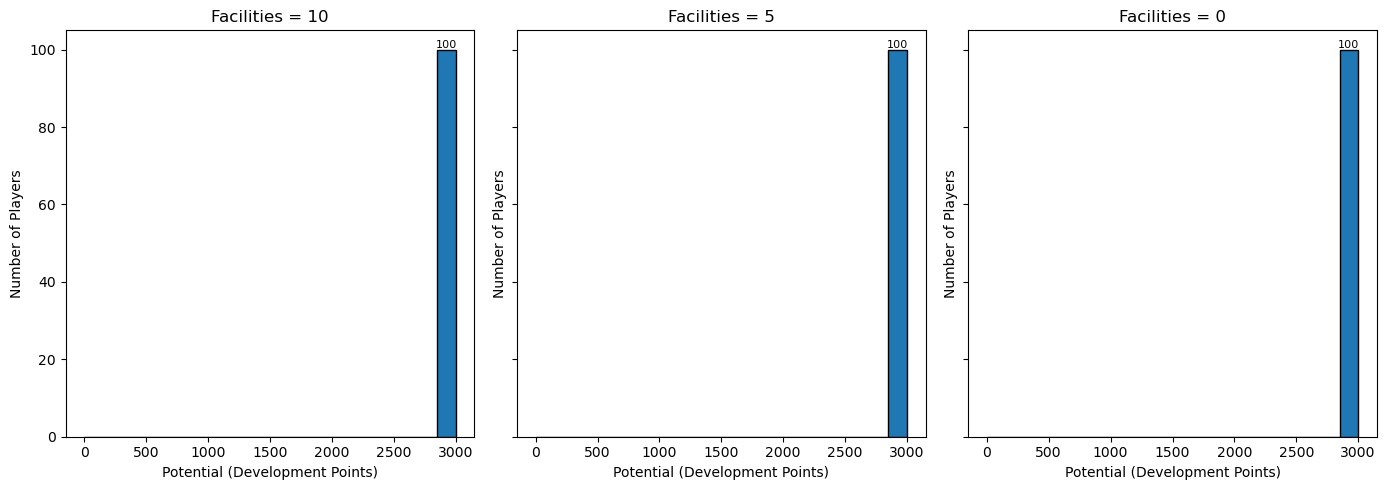


Sample players from Facilities = 10
Oliver Smith (GER), Potential=3000, Traits=['Sweeper Keeper']
Noah Williams (WAL), Potential=3000, Traits=['Target Forward']
Lucas Williams (ITA), Potential=3000, Traits=['Deep-Lying Playmaker']
Noah Taylor (ARG), Potential=3000, Traits=['Poacher']
Leo Young (NED), Potential=3000, Traits=['Poacher']


In [2]:
import random
import uuid
from dataclasses import dataclass, field
from typing import List, Dict, Optional, Tuple
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# CONFIG
# ------------------------------------------------------------

OUTFIELD_ATTRIBUTES = [
    "Finishing", "Passing", "Crossing", "Ball Control",
    "Heading", "Tackling", "Marking", "Strength", "Stamina",
    "Acceleration", "Agility", "Jump Reach", "Vision",
    "Positioning", "Composure", "Work Rate"
]

GOALKEEPER_ATTRIBUTES = [
    "Handling", "Reflexes", "Positioning", "One-on-Ones",
    "Aerial Reach", "Throwing", "Kicking", "Communication",
    "Agility", "Composure", "Strength"
]

NON_PLAYING_ATTRIBUTES = ["Injury Proneness", "Professionalism", "Adaptability", "Aggression"]

POSITION_TRAITS = [
    "Natural Winger", "Deep-Lying Playmaker", "Box-to-Box",
    "Ball-Playing Defender", "Poacher", "Target Forward",
    "Wing Back", "Sweeper Keeper"
]

GAINABLE_TRAITS = [
    "Flair", "Leader", "Big-Game Player", "Workhorse",
    "Set-Piece Specialist", "Tireless Runner", "Speedster",
    "Poacher", "Target Man", "Playmaker"
]

NATIONALITIES = ["ENG", "SCO", "WAL", "NIR", "IRL", "ESP", "FRA", "GER", "BRA", "ARG", "NED", "ITA"]
SKIN_TONES = ["Light", "Tan", "Brown", "Dark"]

# ------------------------------------------------------------
# DATA CLASSES
# ------------------------------------------------------------

@dataclass
class Player:
    player_id: str
    name: str
    nationality: str
    skin_tone: str
    is_goalkeeper: bool

    # Ages
    actual_age_months: int            # total calendar months (e.g., 19y6m = 19*12+6)
    training_age_weeks: int           # training weeks since 16y0m (in-season only)

    # Contract/club
    club_id: Optional[str]
    wage: Optional[float]

    # Development model
    potential: int                    # dev points (1..3000 outfield; GK scaled)
    birth_dev_pct: float
    base_training_pct: float
    growth_training_pct: float
    growth_shape: float
    growth_peak_age: float            # in years (calendar)
    growth_width: float

    # Skills
    attributes: Dict[str, int]
    non_playing_attributes: Dict[str, int]
    position_traits: List[str] = field(default_factory=list)
    gainable_traits: List[str] = field(default_factory=list)

    birth_nominal_dp: float = 0.0
    birth_assigned_dp: float = 0.0

    # ---- Age helpers ----
    def get_actual_age_ym(self) -> Tuple[int, int]:
        y, m = divmod(self.actual_age_months, 12)
        return y, m

    def get_training_age_ym(self) -> Tuple[int, int]:
        # 1 training week == 1 “training month” in-season in this model
        y, m = divmod(self.training_age_weeks, 12)
        return y, m

    def set_actual_age_ym(self, years: int, months: int) -> None:
        self.actual_age_months = years * 12 + months

    # ---- Progression ticks ----
    def tick_training_week(self) -> None:
        """In-season week: +1 actual month, +1 training week."""
        self.actual_age_months += 1
        self.training_age_weeks += 1

    def tick_offseason(self) -> None:
        """Off-season block: +2 actual months, +0 training weeks."""
        self.actual_age_months += 2
# ------------------------------------------------------------
# HELPERS
# ------------------------------------------------------------

def clamp(v: int, lo: int = 1, hi: int = 20) -> int:
    return max(lo, min(hi, v))

def rnd_name() -> str:
    first = random.choice(
        ["Jack", "Oliver", "Harry", "George", "Leo", "Noah",
         "Max", "Lucas", "Oscar", "Theo", "Mason", "Ethan"]
    )
    last = random.choice(
        ["Smith", "Brown", "Jones", "Taylor", "Williams", "Evans",
         "Clark", "Walker", "Harris", "Lewis", "Young", "King"]
    )
    return f"{first} {last}"



Birth budget: 260.0 1000 0.26
Nominal DP spent: 190.871 Assigned DP: 247.282
Attributes: {'Finishing': 1, 'Passing': 7, 'Crossing': 2, 'Ball Control': 1, 'Heading': 1, 'Tackling': 1, 'Marking': 1, 'Strength': 2, 'Stamina': 1, 'Acceleration': 4, 'Agility': 2, 'Jump Reach': 2, 'Vision': 1, 'Positioning': 1, 'Composure': 1, 'Work Rate': 6}
Before season:
P1 actual age (y,m): (15, 0) training weeks: 0
Facilities 10 → Sum of last 5 bins: 6 |||     → Sum of last 3 bins: 3
Facilities 5 → Sum of last 5 bins: 9 |||     → Sum of last 3 bins: 4
Facilities 0 → Sum of last 5 bins: 1 |||     → Sum of last 3 bins: 0


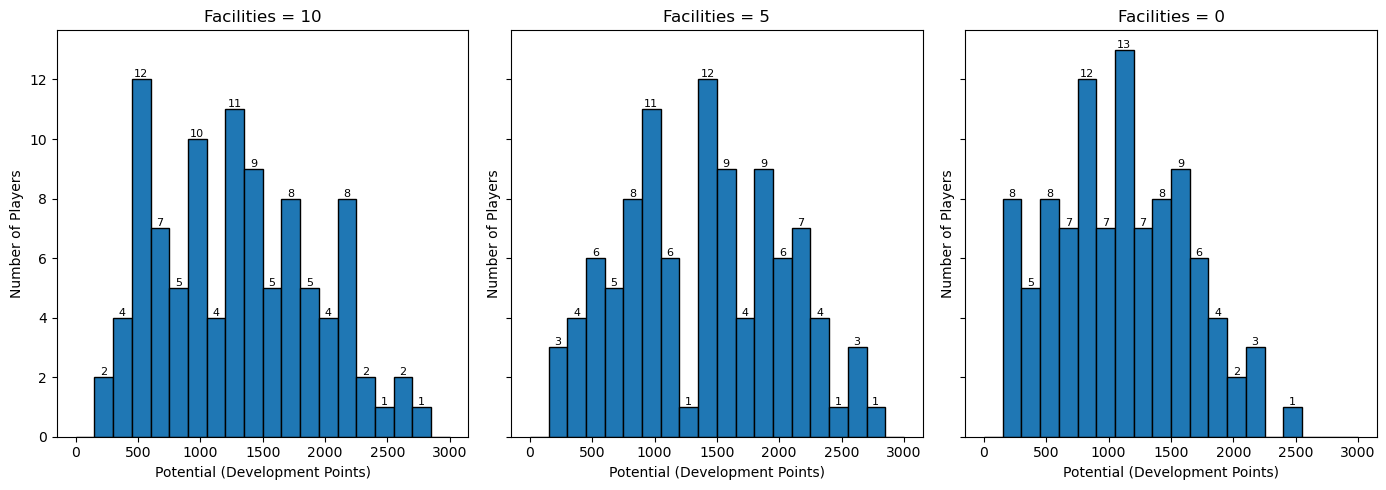


Sample players from Facilities = 10
Mason Harris (BRA), Potential=551, Traits=['Target Forward']
Ethan Evans (ENG), Potential=1900, Traits=['Deep-Lying Playmaker']
Noah Taylor (ENG), Potential=1053, Traits=['Sweeper Keeper']
Oliver Harris (IRL), Potential=851, Traits=['Target Forward']
Theo Taylor (FRA), Potential=1234, Traits=['Target Forward']


In [37]:
# ------------------------------------------------------------
# POTENTIAL GENERATION
# ------------------------------------------------------------

def sample_potential(youth_facilities: int, is_goalkeeper: bool) -> int:
    """
    Skewed potential distribution: high values rare.
    Youth facilities directly influence Beta distribution parameters.
    GK potential scaled down.
    """
    # Base Beta parameters
    alpha_base = 2.0   # Controls skew towards high end
    beta_base = 2.5    # Controls skew towards low end

    # Youth facility influence — better facilities reduce beta (less skew to low)
    alpha = alpha_base #+ (10 - youth_facilities) / 15.0  # more facilities -> more weight to high potential
    beta = beta_base + (10 - youth_facilities) / 20.0

    # Sample from adjusted Beta distribution
    raw_score = np.random.beta(alpha, beta)

    # Scale for GK vs outfield
    max_points = 3000 if not is_goalkeeper else int(3000 * len(GOALKEEPER_ATTRIBUTES) / len(OUTFIELD_ATTRIBUTES))

    return clamp(int(raw_score * max_points), 200, max_points)

# ------------------------------------------------------------
# PLAYER CREATION
# ------------------------------------------------------------
def apply_birth_development(
    is_gk: bool,
    potential: int,
    birth_dev_pct: float,
    DP_PER_ATTR_POINT: float = 10.0,   # DP needed for +1 attribute point
):
    """
    Returns: (attributes dict, nominal_dp_total, assigned_dp_total)

    - Start all attributes at 1.
    - Birth budget = potential * birth_dev_pct - (num_attrs * 5).
      (Charges 5 DP per attribute to represent the skill floor at 1.)
    - Spend remaining budget in random chunks [0.1..0.5] with band efficiencies:
        1–5   : 50% chance -> double assigned
        6–15  : assigned = nominal
        16–17 : 50% chance lose
        18–19 : 75% chance lose
        20    : reroll without consuming nominal
    - Convert assigned DP to +1 attribute when carry >= DP_PER_ATTR_POINT, cap 20.
    """
    attrs_list = GOALKEEPER_ATTRIBUTES if is_gk else OUTFIELD_ATTRIBUTES
    attrs = {a: 1 for a in attrs_list}
    carry = {a: 0.0 for a in attrs_list}

    # --- Baseline cost for starting at 1 in every attribute ---
    base_cost = len(attrs_list) * 5.0
    raw_budget = float(potential) * float(birth_dev_pct)
    budget = max(0.0, raw_budget - base_cost)

    nominal_total = 0.0   # DP attempted (sum of chunks that count nominally)
    assigned_total = 0.0  # DP actually assigned after efficiency rules

    def all_capped():
        return all(v >= 20 for v in attrs.values())

    while budget - nominal_total >= 0.1 - 1e-12:
        if all_capped():
            break

        # pick a non-20 attribute
        for _ in range(50):
            a = random.choice(attrs_list)
            if attrs[a] < 20:
                break
        else:
            break

        val = attrs[a]
        if val >= 20:
            continue

        # Random DP chunk in [x,y]
        chunk = round(random.uniform(1, 15), 3)

        # Efficiency rules -> assigned DP (and consume nominal accordingly)
        assigned = 0.0
        if 1 <= val <= 4:
            assigned = chunk * (2 if random.random() < 0.5 else 1)
            nominal_total += chunk
        elif 5 <= val <= 14:
            assigned = chunk
            nominal_total += chunk
        elif 15 <= val <= 17:
            assigned = chunk if random.random() < 0.5 else 0.0
            nominal_total += chunk
        elif 18 <= val <= 19:
            assigned = chunk if random.random() < 0.33 else 0.0
            nominal_total += chunk

        assigned_total += assigned

       # print("Chunks:", assigned , chunk)

        # Convert assigned DP to attribute points via carry
        if assigned > 0 and attrs[a] < 20:
            carry[a] += assigned
            while carry[a] >= DP_PER_ATTR_POINT and attrs[a] < 20:
                attrs[a] += 1
                carry[a] -= DP_PER_ATTR_POINT

    return attrs, round(nominal_total, 3), round(assigned_total, 3)

def create_player(
    *,
    club_id: Optional[str],
    youth_facilities: int,
    is_goalkeeper: bool = False,
    youth_player: bool = False
) -> Player:
    # Actual starting age based on youth flag
    if youth_player:
        start_age_years, start_age_months = 15, 0
    else:
        start_age_years, start_age_months = 16, 0

    actual_age_months = start_age_years * 12 + start_age_months
    baseline_16m = 16 * 12
    training_age_weeks = max(0, actual_age_months - baseline_16m)

    # Potential
    potential = sample_potential(youth_facilities, is_goalkeeper)

    # Dev splits
    birth_dev_pct = round(random.uniform(0.20, 0.40), 2)
    base_training_pct = round(random.uniform(0.10, 0.40), 2)
    growth_training_pct = round(max(0.0, 1.0 - birth_dev_pct - base_training_pct), 2)

    # ---- Weighted growth_peak_age ----
    peak_values = [x / 2 for x in range(3, 19)]  # 1.5, 2.0, 2.5 ... 9.0
    peak_weights = []
    for val in peak_values:
        if 1.5 <= val < 3.0:
            peak_weights.append(0.3 / len([v for v in peak_values if 1.5 <= v < 3.0]))
        elif 3.0 <= val <= 6.0:
            peak_weights.append(0.5 / len([v for v in peak_values if 3.0 <= v <= 6.0]))
        else:  # > 6.0
            peak_weights.append(0.2 / len([v for v in peak_values if v > 6.0]))
    growth_peak_age = random.choices(peak_values, weights=peak_weights, k=1)[0]

    # ---- Weighted growth_shape based on peak ----
    shape_options = [
        growth_peak_age,
        1.5 * growth_peak_age,
        2.0 * growth_peak_age,
        3.0 * growth_peak_age
    ]
    shape_weights = [0.1, 0.2, 0.5, 0.2]
    growth_shape = round(random.choices(shape_options, weights=shape_weights, k=1)[0], 2)

    # Growth width unchanged
    growth_width = round(random.uniform(4.0, 8.0), 1)

    # ---- Attributes via birth development ----
    attributes, birth_nominal_dp, birth_assigned_dp = apply_birth_development(
        is_gk=is_goalkeeper,
        potential=potential,
        birth_dev_pct=birth_dev_pct
    )
    non_playing = {a: clamp(int(random.gauss(10, 4))) for a in NON_PLAYING_ATTRIBUTES}
    
    position_traits = [random.choice(POSITION_TRAITS)]
    gainable_traits = random.sample(GAINABLE_TRAITS, k=random.randint(1, 3))
    
    return Player(
        player_id=str(uuid.uuid4()),
        name=rnd_name(),
        nationality=random.choice(NATIONALITIES),
        skin_tone=random.choice(SKIN_TONES),
        is_goalkeeper=is_goalkeeper,
        actual_age_months=actual_age_months,
        training_age_weeks=training_age_weeks,
        club_id=club_id,
        wage=None if club_id is None else round(random.uniform(500, 5000), 2),
        potential=potential,
        birth_dev_pct=birth_dev_pct,
        base_training_pct=base_training_pct,
        growth_training_pct=growth_training_pct,
        growth_shape=growth_shape,
        growth_peak_age=growth_peak_age,
        growth_width=growth_width,
        attributes=attributes,
        non_playing_attributes=non_playing,
        position_traits=position_traits,
        gainable_traits=gainable_traits,
        birth_nominal_dp=birth_nominal_dp,
        birth_assigned_dp=birth_assigned_dp
    )


# =========================
# Season progression
# =========================
def play_one_season(player_list: List[Player], season_weeks: int = 10) -> None:
    """
    One season = 10 in-season weeks (each adds +1 actual month and +1 training week),
    then off-season (+2 actual months, +0 training weeks).
    """
    for _ in range(season_weeks):
        for p in player_list:
            p.tick_training_week()
    for p in player_list:
        p.tick_offseason()

# =========================
# Example usage
# =========================
if __name__ == "__main__":
    random.seed(7)
    # Create two players at different starting ages
    p1 = create_player(club_id="CLUB123", youth_facilities=15, youth_player=True)   # age 15y0m
   # p2 = create_player(club_id="CLUB123", youth_facilities=15, youth_player=False)  # age 16y0m

   
    print("Birth budget:", p1.potential * p1.birth_dev_pct, p1.potential, p1.birth_dev_pct)
    print("Nominal DP spent:", p1.birth_nominal_dp, "Assigned DP:", p1.birth_assigned_dp)
    print("Attributes:", p1.attributes)

    print("Before season:")
    print("P1 actual age (y,m):", p1.get_actual_age_ym(), "training weeks:", p1.training_age_weeks)
    #print("P2 actual age (y,m):", p2.get_actual_age_ym(), "training weeks:", p2.training_age_weeks)

    #play_one_season([p1, p2])  # 10 training weeks + 2 calendar months off-season

   # print("\nAfter one season:")
   # print("P1 actual age (y,m):", p1.get_actual_age_ym(), "training weeks:", p1.training_age_weeks)
   # print("P2 actual age (y,m):", p2.get_actual_age_ym(), "training weeks:", p2.training_age_weeks)


# ------------------------------------------------------------
# DEMO
# ------------------------------------------------------------

def demo():
    club_id = "CLUB123"
    
    # Compare two facility levels
    fac_levels = [10, 5,0]
    results = []

    for fac in fac_levels:
        players = [create_player(club_id=club_id, youth_facilities=fac,  is_goalkeeper= False,
    youth_player = False) for _ in range(100)]
        potentials = [p.potential for p in players]
        results.append((fac, potentials, players))

    # Plot side-by-side histograms
    fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)
    bins = list(range(0, 3100, 150))  # 0–3000 range, step ~150

    for ax, (fac, potentials, _) in zip(axes, results):
        counts, bin_edges, patches = ax.hist(potentials, bins=bins, edgecolor='black')
        ax.set_title(f"Facilities = {fac}")
        ax.set_xlabel("Potential (Development Points)")
        ax.set_ylabel("Number of Players")

        # Add value labels above each bar
        for count, edge_left, edge_right in zip(counts, bin_edges[:-1], bin_edges[1:]):
            if count > 0:
                ax.text(
                    (edge_left + edge_right) / 2,
                    count,
                    str(int(count)),
                    ha='center', va='bottom', fontsize=8
                )

        # Sum of last 5 bins
        last5_sum = sum(counts[-5:])
        last3_sum = sum(counts[-3:])
        print(f"Facilities {fac} → Sum of last 5 bins: {int(last5_sum)} |||     → Sum of last 3 bins: {int(last3_sum)}")

        
        
    
        

    plt.tight_layout()
    plt.show()

    print("\nSample players from Facilities = 10")
    for p in random.sample(results[0][2], 5):
        print(f"{p.name} ({p.nationality}), Potential={p.potential}, Traits={p.position_traits}")
        
if __name__ == "__main__":
    demo()

In [38]:
# -------- Example Outfield programs --------
OUTFIELD_PROGRAMS: Dict[str, Dict[str, float]] = {
    "Balanced": {a: 1.0 for a in OUTFIELD_ATTRIBUTES},
    "Finishing": {
        **{a: 0.1 for a in OUTFIELD_ATTRIBUTES},
        "Finishing": 4.0
    },
    "Playmaking": {
        **{a: 0.7 for a in OUTFIELD_ATTRIBUTES},
        "Passing": 3.0, "Vision": 3.0, "Ball Control": 2.0, "Composure": 1.5
    },
    "Defending": {
        **{a: 0.7 for a in OUTFIELD_ATTRIBUTES},
        "Tackling": 3.0, "Marking": 3.0, "Positioning": 2.0, "Strength": 1.5
    },
    "Pace & Power": {
        **{a: 0.7 for a in OUTFIELD_ATTRIBUTES},
        "Acceleration": 3.0, "Agility": 2.0, "Stamina": 2.0, "Strength": 2.0
    },
    "Aerial": {
        **{a: 0.7 for a in OUTFIELD_ATTRIBUTES},
        "Heading": 3.0, "Jump Reach": 3.0, "Strength": 1.5, "Positioning": 1.5
    },
    "Crossing & Wide": {
        **{a: 0.7 for a in OUTFIELD_ATTRIBUTES},
        "Crossing": 3.0, "Acceleration": 2.0, "Ball Control": 1.5, "Vision": 1.5
    },
}

# -------- Example Goalkeeper programs --------
GK_PROGRAMS: Dict[str, Dict[str, float]] = {
    "Balanced": {a: 1.0 for a in GOALKEEPER_ATTRIBUTES},
    "Shot-Stopping": {
        **{a: 0.7 for a in GOALKEEPER_ATTRIBUTES},
        "Reflexes": 3.0, "Handling": 2.5, "Agility": 2.0, "Composure": 1.5
    },
    "Sweeper Keeper": {
        **{a: 0.7 for a in GOALKEEPER_ATTRIBUTES},
        "Communication": 2.5, "Kicking": 2.0, "Throwing": 2.0, "Positioning": 1.5
    },
    "Aerial/High Claims": {
        **{a: 0.7 for a in GOALKEEPER_ATTRIBUTES},
        "Aerial Reach": 3.0, "Handling": 2.0, "Strength": 1.5, "Positioning": 1.5
    },
}


def training_facility_multiplier(level: int, max_level: int = 10, floor: float = 0.5) -> float:
    """
    Multiplier applied to the weekly DP. 
    - At max level → 1.0
    - At level 0   → 'floor' (default 0.5)
    Linear between floor..1.0
    """
    level = max(0, min(max_level, int(level)))
    return floor + (1.0 - floor) * (level / max_level)

def uniform_weights_for(player: Player, val: float = 1.0) -> Dict[str, float]:
    attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES
    return {a: val for a in attrs}

def get_program_catalog(player: Player) -> Dict[str, Dict[str, float]]:
    return GK_PROGRAMS if player.is_goalkeeper else OUTFIELD_PROGRAMS

# === General training program (equal weights for all attributes) ===
def get_general_program(is_goalkeeper: bool) -> Dict[str, float]:
    attrs = GOALKEEPER_ATTRIBUTES if is_goalkeeper else OUTFIELD_ATTRIBUTES
    weight = 1.0 / len(attrs)
    return {a: weight for a in attrs}


def build_program_mix_weights(
    player: Player,
    *,
    primary_name: Optional[str],
    primary_share: float,
    secondary_name: Optional[str],
    secondary_share: float,
    general_share: float
) -> Dict[str, float]:
    """
    Final attribute weights = primary_share * primary_prog
                            + secondary_share * secondary_prog
                            + general_share * uniform
    Shares can be any non-negative numbers; they will be normalized.
    """
    # Normalize shares
    total_share = max(1e-9, primary_share + secondary_share + general_share)
    p_share = primary_share / total_share
    s_share = secondary_share / total_share
    g_share = general_share / total_share

    catalog = get_program_catalog(player)
    primary = catalog.get(primary_name, None) if primary_name else None
    secondary = catalog.get(secondary_name, None) if secondary_name else None
    general = uniform_weights_for(player, 1.0)

    # Start from zeros
    final_weights: Dict[str, float] = uniform_weights_for(player, 0.0)

    # Add weighted programs
    if primary:
        for k, v in primary.items():
            final_weights[k] = final_weights.get(k, 0.0) + p_share * float(v)
    if secondary:
        for k, v in secondary.items():
            final_weights[k] = final_weights.get(k, 0.0) + s_share * float(v)
    # General (uniform)
    for k, v in general.items():
        final_weights[k] = final_weights.get(k, 0.0) + g_share * float(v)

    # Safety: if everything became 0, fall back to uniform
    if sum(final_weights.values()) <= 0:
        final_weights = general

    return final_weights

def choose_training_attribute(player: Player, weights: Optional[Dict[str, float]]) -> Optional[str]:
    attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES
    # Filter out capped
    candidates = [(a, max(0.0, (weights or {}).get(a, 1.0))) for a in attrs if player.attributes[a] < 20]
    if not candidates:
        return None
    names, w = zip(*candidates)
    total = sum(w)
    if total <= 0:
        names = [a for a in attrs if player.attributes[a] < 20]
        return random.choice(names) if names else None
    r = random.uniform(0, total)
    cum = 0.0
    for name, ww in candidates:
        cum += ww
        if r <= cum:
            return name
    return candidates[-1][0]

# ========= Growth schedule (Weibull over training weeks) =========
def weibull_pdf_months(x_months: int, a: float, b: float) -> float:
    if x_months <= 0 or a <= 0 or b <= 0:
        return 0.0
    x10 = x_months / 10.0
    scale = 10.0 * (b ** a)
    return (a / scale) * (x10 ** (a - 1.0)) * math.exp(-((x10 / b) ** a))

def compile_growth_schedule(player: Player, total_weeks: int = 160) -> List[float]:
    """
    Normalized weights for growth DP across training weeks (16->32y).
    Uses player's growth_shape (a), growth_peak_age (years), growth_width (spread).
    """
    a = max(0.1, float(player.growth_shape))
    b = max(0.25, float(player.growth_peak_age))
    # interpret width as multiplicative spread factor around a neutral ~6.0
   

    weights = [weibull_pdf_months(wk, a, b) for wk in range(1, total_weeks + 1)]
    s = sum(weights) or 1.0
    return [w / s for w in weights]

# ========= Training allocation with same efficiency rules =========

import math

def _ensure_training_carry(player: Player):
    """Create a persistent per-attribute DP carry used during career training."""
    if not hasattr(player, "_train_carry"):
        attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES
        player._train_carry = {a: 0.0 for a in attrs}
    else:
        # ensure all keys exist (in case attribute set changed)
        attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES
        for a in attrs:
            player._train_carry.setdefault(a, 0.0)

def _assign_chunk_with_efficiency(player: Player, chunk: float, weights: Optional[Dict[str, float]] = None) -> tuple[float, float]:
    """
    Try to assign 'chunk' DP to a weighted random attribute using efficiency bands.
    Returns (nominal_used, assigned_dp).
    If we pick a 20-rated attr, we reroll without consuming nominal.
    """
    attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES

    # Pick attribute using weights (fall back to random)
    if weights:
        a = choose_training_attribute(player, weights)
        if a is None:
            return (0.0, 0.0)
    else:
        # fallback: pick any non-20
        for _ in range(50):
            a = random.choice(attrs)
            if player.attributes[a] < 20:
                break
        else:
            return (0.0, 0.0)

    val = player.attributes[a]
    # Efficiency rules
    if 1 <= val <= 5:
        assigned = chunk * (2 if random.random() < 0.5 else 1)
        nominal = chunk
    elif 6 <= val <= 15:
        assigned = chunk
        nominal = chunk
    elif 16 <= val <= 17:
        assigned = chunk if random.random() < 0.5 else 0.0
        nominal = chunk
    elif 18 <= val <= 19:
        assigned = chunk if random.random() < 0.33 else 0.0
        nominal = chunk
    else:  # val == 20
        return (0.0, 0.0)

    # Track carry for delayed conversion
    _ensure_training_carry(player)
    player._train_carry[a] += assigned
    return (nominal, assigned)
def _convert_carry_to_attributes(player: Player, DP_PER_ATTR_POINT: float):
    """Convert carry to real +1s as long as thresholds are reached, capping at 20."""
    attrs = GOALKEEPER_ATTRIBUTES if player.is_goalkeeper else OUTFIELD_ATTRIBUTES
    for a in attrs:
        while player._train_carry[a] >= DP_PER_ATTR_POINT and player.attributes[a] < 20:
            player.attributes[a] += 1
            player._train_carry[a] -= DP_PER_ATTR_POINT

def train_player_week(
    player: Player,
    growth_weights_cache: List[float],
    *,
    training_facilities_level: int = 10,
    # program mix:
    primary_program: Optional[str] = "Finishing",
    primary_share: float = 0.6,
    secondary_program: Optional[str] = "Finishing",
    secondary_share: float = 0.3,
    general_share: float = 0.1,
    total_weeks: int = 160,
    DP_PER_ATTR_POINT: float = 10.0,
    chunk_min: float = 0.1,
    chunk_max: float = 0.5,
) -> tuple[float, float]:
    """
    One in-season training week with:
      - Facilities multiplier
      - Program mix (primary/secondary/general)
      - Same efficiency rules & chunking
    Returns (nominal_used, assigned_dp).
    """
    # Build mixed program weights
    prog_weights = build_program_mix_weights(
        player,
        primary_name=primary_program,
        primary_share=primary_share,
        secondary_name=secondary_program,
        secondary_share=secondary_share,
        general_share=general_share
    )
    #print(prog_weights)
    if not primary_program and not secondary_program:
        # 100% general training if no specific programs
        primary_program = get_general_program(player.is_goalkeeper)
        primary_share = 1.0
        secondary_program = None
        secondary_share = 0.0
        general_share = 0.0

    # Pools
    total_base   = player.potential * player.base_training_pct
    total_growth = player.potential * player.growth_training_pct

    base_this_week = total_base / total_weeks if player.training_age_weeks < total_weeks else 0.0
    idx = max(0, min(total_weeks - 1, player.training_age_weeks))
    growth_this_week = total_growth * (growth_weights_cache[idx] if player.training_age_weeks < total_weeks else 0.0)

    dp_week = base_this_week + growth_this_week
    dp_week *= training_facility_multiplier(training_facilities_level)  # facilities penalty

    nominal_used = 0.0
    assigned_dp = 0.0
    budget = dp_week
    safety = 0

    retry = 0
    while budget - nominal_used >= chunk_min - 1e-9 and safety < 4000:
        safety += 1
        chunk = min(budget - nominal_used, random.uniform(chunk_min, chunk_max))

        used, got = _assign_chunk_with_efficiency(player, chunk, prog_weights)
        if used == 0.0 and got == 0.0:
            retry += 1
            if retry < 12:
                continue  # try again with a new pick
            else:
                break      # likely all near-cap with heavy losses
        retry = 0

        nominal_used += used
        assigned_dp += got
        _convert_carry_to_attributes(player, DP_PER_ATTR_POINT)
    player.tick_training_week()
    return (round(nominal_used, 3), round(assigned_dp, 3))

def train_one_season_with_growth(
    players: List[Player],
    growth_caches: Dict[str, List[float]],
    *,
    training_facilities_level: int = 10,
    primary_program: Optional[str] = "Defending",
    primary_share: float = .4,
    secondary_program: Optional[str] = "Aerial",
    secondary_share: float = .2,
    general_share: float = 0.4,
    season_weeks: int = 10,
    total_weeks: int = 160,
    DP_PER_ATTR_POINT: float = 10.0,
) -> Dict[str, tuple[float, float]]:
    per_player_totals: Dict[str, tuple[float, float]] = {p.player_id: (0.0, 0.0) for p in players}

    for _ in range(season_weeks):
        for p in players:
            nom, asg = train_player_week(
                p,
                growth_weights_cache=growth_caches[p.player_id],
                training_facilities_level=training_facilities_level,
                primary_program=primary_program,
                primary_share=primary_share,
                secondary_program=secondary_program,
                secondary_share=secondary_share,
                general_share=general_share,
                total_weeks=total_weeks,
                DP_PER_ATTR_POINT=DP_PER_ATTR_POINT
            )
            n0, a0 = per_player_totals[p.player_id]
            per_player_totals[p.player_id] = (n0 + nom, a0 + asg)

    for p in players:
        p.tick_offseason()

    return {pid: (round(n, 1), round(a, 1)) for pid, (n, a) in per_player_totals.items()}

  

In [39]:
# Prepare a player and his growth schedule cache
p1 = create_player(club_id="CLUB123", youth_facilities=10, youth_player=False)
cache_p1 = compile_growth_schedule(p1, total_weeks=160)

#p1.potential = 3000 #sample_potential(youth_facilities, is_goalkeeper)

print("== Before training ==")
print("Age:", p1.get_actual_age_ym(), "| weeks:", p1.training_age_weeks, p1.potential, p1.birth_dev_pct, p1.base_training_pct,p1.growth_training_pct
      , p1.growth_shape, p1.growth_peak_age, p1.growth_width)
print("Some attrs:", {k: p1.attributes[k] for k in list(p1.attributes)[:16]})

# Train 3 seasons
for yr in range(1, 17):
    season_totals = train_one_season_with_growth([p1], {p1.player_id: cache_p1}, season_weeks=10, DP_PER_ATTR_POINT=10.0)
    n, a = season_totals[p1.player_id]
    print(f"\n== After season {yr} ==")
    print("Age:", p1.get_actual_age_ym(), "| weeks:", p1.training_age_weeks, f"| season DP (nom/assg): {n}/{a}")
    # print a few attributes to see growth
    print("Some attrs:", {k: p1.attributes[k] for k in list(p1.attributes)[:16]})

== Before training ==
Age: (16, 0) | weeks: 0 1720 0.37 0.32 0.31 2.25 1.5 5.3
Some attrs: {'Finishing': 5, 'Passing': 4, 'Crossing': 2, 'Ball Control': 4, 'Heading': 6, 'Tackling': 9, 'Marking': 8, 'Strength': 2, 'Stamina': 5, 'Acceleration': 3, 'Agility': 5, 'Jump Reach': 8, 'Vision': 2, 'Positioning': 6, 'Composure': 10, 'Work Rate': 1}

== After season 1 ==
Age: (17, 0) | weeks: 10 | season DP (nom/assg): 226.7/277.1
Some attrs: {'Finishing': 6, 'Passing': 5, 'Crossing': 3, 'Ball Control': 5, 'Heading': 7, 'Tackling': 11, 'Marking': 9, 'Strength': 4, 'Stamina': 6, 'Acceleration': 4, 'Agility': 6, 'Jump Reach': 9, 'Vision': 3, 'Positioning': 7, 'Composure': 11, 'Work Rate': 2}

== After season 2 ==
Age: (18, 0) | weeks: 20 | season DP (nom/assg): 304.3/342.3
Some attrs: {'Finishing': 7, 'Passing': 7, 'Crossing': 6, 'Ball Control': 7, 'Heading': 10, 'Tackling': 14, 'Marking': 13, 'Strength': 6, 'Stamina': 7, 'Acceleration': 6, 'Agility': 7, 'Jump Reach': 11, 'Vision': 5, 'Positioning